--- Combined Data with Weighted Average Duration ---
                combined_act_name  combined_avg_duration  total_cases
3               Motor Vehicle Act                   9.64       111483
2            Karnataka Police Act                  18.00       183806
5                    Railways Act                  28.31       508609
6      Tamil Nadu Prohibition Act                  30.00        96754
1                      Excise Act                  32.00       354246
4                      Police Act                  34.86        83758
0  Birth & Death Registration Act                  36.00        10927


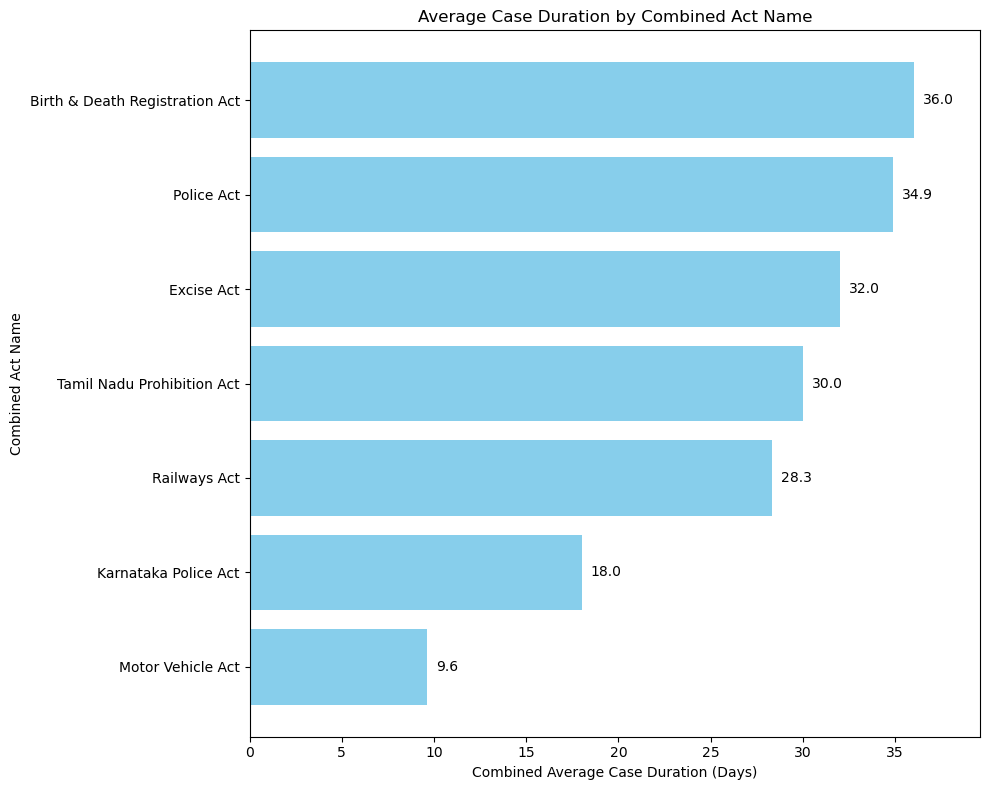

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Input Data
data = [
    ("185 M.V.ACT", 2, 14221),
    ("IMV ACT", 7, 85470),
    ("98 KP Act", 11, 15958),
    ("Railway Act", 11, 33471),
    ("Railways Act 1989", 13, 31244),
    ("KARNATAKA POLICE ACT", 18, 55691),
    ("K.P.Act.", 19, 112157),
    ("Indian Police Act", 23, 17542),
    ("RAILWAYS ACT, 1989", 27, 70776),
    ("Railways Act", 30, 242794), # Note: Appears twice, data might need checking, but we proceed
    ("TamilNadu Prohibition Act", 30, 96754),
    ("Excise Act 1915", 32, 354246),
    ("Railway Act, 1989", 34, 130324),
    ("13 Sub 3 of Birth and Death Registration Act 1969", 36, 10927),
    ("Police Act 1861", 38, 66216),
    ("INDIAN MOTOR VEHICLE ACT", 38, 11792),
]

# 2. Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['raw_act_name', 'avg_duration', 'case_count'])

# 3. Define mapping for combining similar names
# Carefully review this mapping based on your understanding of the acts
act_name_mapping = {
    "185 M.V.ACT": "Motor Vehicle Act",
    "IMV ACT": "Motor Vehicle Act",
    "INDIAN MOTOR VEHICLE ACT": "Motor Vehicle Act",
    "98 KP Act": "Karnataka Police Act",
    "KARNATAKA POLICE ACT": "Karnataka Police Act",
    "K.P.Act.": "Karnataka Police Act",
    "Indian Police Act": "Police Act", # Keeping separate from Karnataka Police Act
    "Police Act 1861": "Police Act",
    "Railway Act": "Railways Act",
    "Railways Act 1989": "Railways Act",
    "RAILWAYS ACT, 1989": "Railways Act",
    "Railways Act": "Railways Act", # Already mapped, handles duplicates
    "Railway Act, 1989": "Railways Act", # Map variation
    "TamilNadu Prohibition Act": "Tamil Nadu Prohibition Act",
    "Excise Act 1915": "Excise Act",
    "13 Sub 3 of Birth and Death Registration Act 1969": "Birth & Death Registration Act",
}

# 4. Apply the mapping to create a normalized name column
# If a name is not in the mapping, use its title-cased version as default
df['combined_act_name'] = df['raw_act_name'].map(act_name_mapping).fillna(df['raw_act_name'].str.title())

# 5. Calculate weighted average duration for combined groups
# Calculate total weighted duration (sum of duration * count) for each group
df['weighted_duration'] = df['avg_duration'] * df['case_count']

# Group by the combined name and aggregate
grouped_data = df.groupby('combined_act_name').agg(
    total_weighted_duration=('weighted_duration', 'sum'),
    total_cases=('case_count', 'sum')
).reset_index()

# Calculate the new combined average duration
grouped_data['combined_avg_duration'] = grouped_data['total_weighted_duration'] / grouped_data['total_cases']

# Handle potential division by zero if total_cases is somehow 0
grouped_data['combined_avg_duration'] = grouped_data['combined_avg_duration'].fillna(0)

# 6. Prepare for Plotting: Sort by average duration
plot_data = grouped_data.sort_values('combined_avg_duration', ascending=True) # Ascending for horizontal bar chart

print("--- Combined Data with Weighted Average Duration ---")
print(plot_data[['combined_act_name', 'combined_avg_duration', 'total_cases']].round(2))


# 7. Create the Bar Chart
plt.figure(figsize=(10, 8)) # Adjust figure size as needed

bars = plt.barh(plot_data['combined_act_name'], plot_data['combined_avg_duration'], color='skyblue')

# Add labels showing the average duration on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.1f}', # Format duration value
        va='center',
        ha='left'
    )

plt.xlabel('Combined Average Case Duration (Days)')
plt.ylabel('Combined Act Name')
plt.title('Average Case Duration by Combined Act Name')
plt.xlim(0, plot_data['combined_avg_duration'].max() * 1.1) # Adjust x-axis limit for labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()